In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Step 1: Reading the data
data = pd.read_csv('extended_activities.csv')

# Step 2: Describe the data
print(data.head())  # Display the first few rows
print(data.info())   # Display data types and missing values
print(data.describe())  # Display summary statistics

   Activity ID          Activity Date Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07    Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01  Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29  Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17    Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08    Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           133.0             12.0    False   
2          5817     32.38           139.0             19.0    False   
3          3851     21.68           140.0             11.0    False   
4          5843     32.36           131.0             14.0    False   

  Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
0           NaN  ...             412.9              342.1   
1           NaN  ...             342

In [3]:
# Dropping unnecessary columns
columns_to_drop = ['Filename', 'Activity Gear']  
data.drop(columns=columns_to_drop, inplace=True)

In [4]:
# Step 3: Data Cleaning
# Checking for missing values
print(data.isnull().sum())

Activity ID                    0
Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Max Heart Rate                 0
Relative Effort                0
Commute                        0
Athlete Weight               275
Bike Weight                  183
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 1
Elevation Loss                 7
Elevation Low                  7
Elevation High                 7
Max Grade                      0
Average Grade                  0
Max Cadence                    0
Average Cadence                0
Average Heart Rate             0
Average Watts                  0
Calories                       0
Average Temperature          161
Total Work                   148
Perceived Exertion           344
Weighted Average Power         0
Power Count                    0
Prefer Per

In [5]:
# Filling missing values with mean for numeric columns
numeric_columns = ['Elapsed Time', 'Max Heart Rate', 'Athlete Weight', 
                   'Bike Weight', 'Moving Time', 'Max Speed', 'Average Speed','Elevation Gain', 
                   'Elevation Loss', 'Elevation Low', 'Elevation High',
                   'Average Cadence', 'Average Heart Rate','Average Watts','Calories', 
                   'Average Temperature', 'Total Work', 'Perceived Exertion', 'Weighted Average Power', 
                   'Power Count', 'Prefer Perceived Exertion','Perceived Relative Effort', 
                   'Grade Adjusted Distance', 'Average Elapsed Speed','Dirt Distance', 
                   'Total Steps', 'Maximum Power 5s','Maximum Power 10s','Maximum Power 30s',
                   'Maximum Power 1.0min','Maximum Power 5.0min','Maximum Power 10.0min',
                   'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr',
                   'Maximum Power 1.5 hr','Maximum Power 2.0 hr']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

    
# Drop rows with missing values in specified non-numeric columns
non_numeric_columns = ['Activity ID', 'Activity Date','Activity Name','Activity Type']
data.dropna(subset=non_numeric_columns, inplace=True)

In [6]:
# Checking for missing values
print(data.isnull().sum())

Activity ID                  0
Activity Date                0
Activity Name                0
Activity Type                0
Elapsed Time                 0
Distance                     0
Max Heart Rate               0
Relative Effort              0
Commute                      0
Athlete Weight               0
Bike Weight                  0
Moving Time                  0
Max Speed                    0
Average Speed                0
Elevation Gain               0
Elevation Loss               0
Elevation Low                0
Elevation High               0
Max Grade                    0
Average Grade                0
Max Cadence                  0
Average Cadence              0
Average Heart Rate           0
Average Watts                0
Calories                     0
Average Temperature          0
Total Work                   0
Perceived Exertion           0
Weighted Average Power       0
Power Count                  0
Prefer Perceived Exertion    0
Perceived Relative Effort    0
Grade Ad

In [7]:
# Filtering Data for specified activity types
filtered_data = data[data['Activity Type'] == 'Ride'].copy()

In [8]:
# Checking for missing values
print(filtered_data.isnull().sum())

Activity ID                  0
Activity Date                0
Activity Name                0
Activity Type                0
Elapsed Time                 0
Distance                     0
Max Heart Rate               0
Relative Effort              0
Commute                      0
Athlete Weight               0
Bike Weight                  0
Moving Time                  0
Max Speed                    0
Average Speed                0
Elevation Gain               0
Elevation Loss               0
Elevation Low                0
Elevation High               0
Max Grade                    0
Average Grade                0
Max Cadence                  0
Average Cadence              0
Average Heart Rate           0
Average Watts                0
Calories                     0
Average Temperature          0
Total Work                   0
Perceived Exertion           0
Weighted Average Power       0
Power Count                  0
Prefer Perceived Exertion    0
Perceived Relative Effort    0
Grade Ad

In [9]:
# Checking unique values in 'Activity Type' column to see if 'Run' is present
print(filtered_data['Activity Type'].unique())

['Ride']


In [10]:
# Calculate FTP for each row
ftp_values = []
for index, row in filtered_data.iterrows():
    # Assuming FTP is defined as 95% of the maximum 20-minute power
    ftp = 0.95 * row['Maximum Power 20.0min']
    ftp_values.append(ftp)

# Add 'ftp_values' column to the DataFrame
filtered_data['ftp_values'] = ftp_values

# Save the DataFrame to a new CSV file
filtered_data.to_csv('cycling_data_with_ftp.csv', index=False)

In [11]:
ftp_data = pd.read_csv('cycling_data_with_ftp.csv')
ftp_data.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Athlete Weight,...,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,ftp_values
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,84.0,...,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0,114.760
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,84.0,...,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0,115.995
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,84.0,...,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0,121.125
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,84.0,...,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0,132.715
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,80.0,...,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0,113.430


In [12]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separate features (power curve data) and target variable (ftp_values)
X = ftp_data.drop(columns=['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'ftp_values'])
y = ftp_data['ftp_values']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression Mean Squared Error:", linear_reg_mse)

# Decision Trees
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
print("Decision Trees Mean Squared Error:", decision_tree_mse)

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print("Random Forest Mean Squared Error:", random_forest_mse)

Linear Regression Mean Squared Error: 1.1748561099602969e-22
Decision Trees Mean Squared Error: 12.79525472972973
Random Forest Mean Squared Error: 10.144436217837812


In [13]:
# Convert 'Activity Date' column to datetime format
ftp_data['Activity Date'] = pd.to_datetime(ftp_data['Activity Date'])

# Filter data based on date range
start_date = '2021-09-30'
end_date = '2023-01-30'
filtered_data = ftp_data[(ftp_data['Activity Date'] >= start_date) & (ftp_data['Activity Date'] <= end_date)]

# Separate features (power curve data) and target variable (ftp_values)
X = filtered_data.drop(columns=['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'ftp_values'])
y = filtered_data['ftp_values']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store MSE and R2 scores for each model
mse_scores = {}
r2_scores = {}

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
mse_scores['Linear Regression'] = linear_reg_mse
r2_scores['Linear Regression'] = linear_reg_r2

# Decision Trees
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
mse_scores['Decision Trees'] = decision_tree_mse
r2_scores['Decision Trees'] = decision_tree_r2

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)
mse_scores['Random Forest'] = random_forest_mse
r2_scores['Random Forest'] = random_forest_r2

# Print MSE and R2 scores for each model
print("Mean Squared Error (MSE):")
for model, mse in mse_scores.items():
    print(f"{model}: {mse}")

print("\nR-squared (R2) scores:")
for model, r2 in r2_scores.items():
    print(f"{model}: {r2}")

Mean Squared Error (MSE):
Linear Regression: 1.7249433618430167e-21
Decision Trees: 84.40292812500002
Random Forest: 92.24610172390575

R-squared (R2) scores:
Linear Regression: 1.0
Decision Trees: 0.944141510860253
Random Forest: 0.9389508399080937


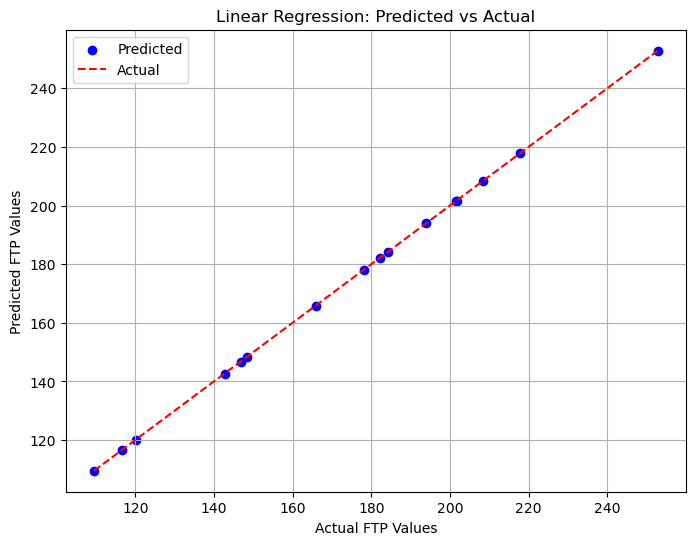

In [14]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual FTP Values')
plt.ylabel('Predicted FTP Values')
plt.legend()
plt.grid(True)
plt.show()

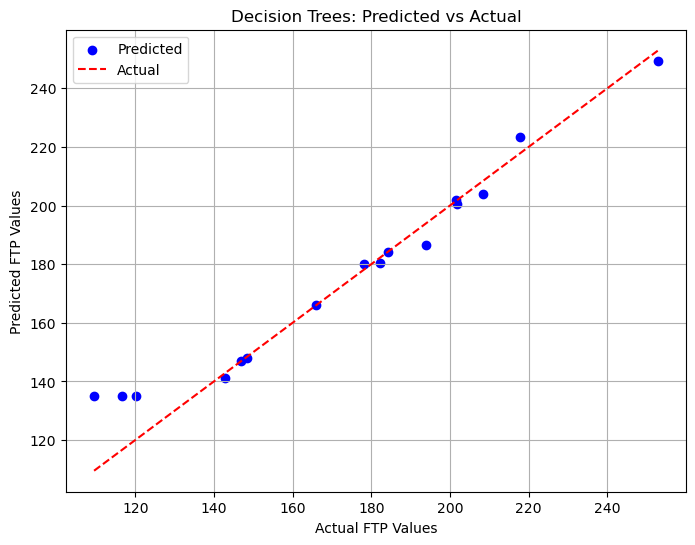

In [15]:
# Plot Predicted vs Actual for Decision Trees
plt.figure(figsize=(8, 6))
plt.scatter(y_test, decision_tree_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Decision Trees: Predicted vs Actual')
plt.xlabel('Actual FTP Values')
plt.ylabel('Predicted FTP Values')
plt.legend()
plt.grid(True)
plt.show()

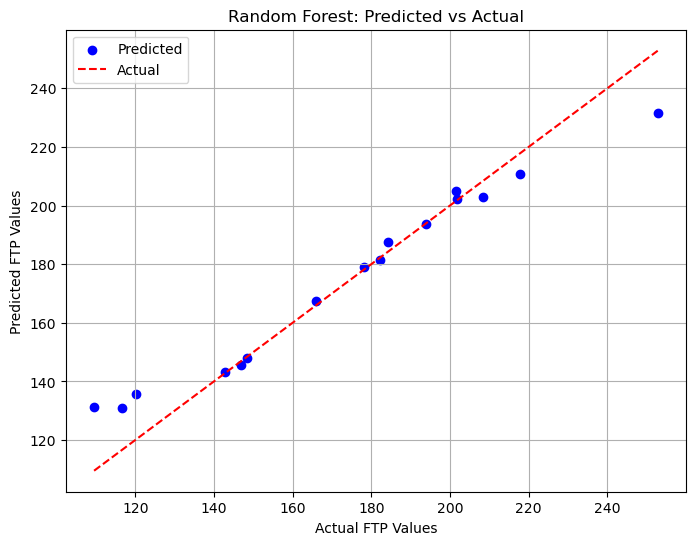

In [16]:
# Plot Predicted vs Actual for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, random_forest_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual FTP Values')
plt.ylabel('Predicted FTP Values')
plt.legend()
plt.grid(True)
plt.show()

### In this case: 
1. Linear Regression:

- Performance: The linear regression model achieved an extremely low Mean Squared Error (MSE) of approximately 1.72e-21, indicating that its predictions are almost identical to the actual FTP values. The R-squared (R2) score of 1.0 suggests that the model perfectly explains the variability in the FTP values, indicating a perfect fit.
- Recommendation: Given its excellent performance and simplicity, the linear regression model can be considered highly reliable for predicting FTP values within the specified date range.

2. Decision Trees:

- Performance: The decision tree model achieved a higher MSE of approximately 84.40, indicating some level of prediction error compared to linear regression. However, the R-squared (R2) score of 0.944 indicates that the model explains about 94.4% of the variability in the FTP values, which is still very good.
- Recommendation: The decision tree model provides good predictive accuracy and is capable of capturing complex relationships within the data. It may be suitable for situations where interpretability is less important than predictive performance.

3. Random Forest:

- Performance: The random forest model achieved a similar MSE to the decision tree model, with an MSE of approximately 92.25. However, its R-squared (R2) score of 0.939 suggests that it explains about 93.9% of the variability in the FTP values, which is slightly lower than the decision tree model.
- Recommendation: Random forest models are known for their robustness and ability to handle noise and overfitting. While its predictive accuracy is slightly lower than the decision tree model in this case, it still provides reliable predictions and can be a good choice for FTP prediction.

4. Conclusion: Based on the results, all three models—linear regression, decision trees, and random forest—perform well in predicting FTP values within the specified date range.